In [12]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
# count unique identifications
MAX_Q_VALUE_FOR_COUNTING_RESULTS = 0.01

In [4]:
sequences_df = pd.read_pickle('/Users/darylwilding-mcbride/Downloads/experiments/P3856/sequence-library.pkl')

In [5]:
sequences_df.columns

Index(['sequence', 'charge', 'theoretical_mz', 'experiment_scan_mean',
       'experiment_scan_std_dev', 'experiment_scan_peak_width',
       'experiment_rt_mean', 'experiment_rt_std_dev',
       'experiment_rt_peak_width', 'experiment_intensity_mean',
       'experiment_intensity_std_dev', 'number_of_runs_identified', 'q_value'],
      dtype='object')

In [6]:
len(sequences_df[(sequences_df.q_value <= MAX_Q_VALUE_FOR_COUNTING_RESULTS)])

23295

In [7]:
len(sequences_df.drop_duplicates(subset=['sequence', 'charge'], keep='first', inplace=False))

23295

In [8]:
sequences_df.sample(n=10)

,sequence,charge,theoretical_mz,experiment_scan_mean,experiment_scan_std_dev,experiment_scan_peak_width,experiment_rt_mean,experiment_rt_std_dev,experiment_rt_peak_width,experiment_intensity_mean,experiment_intensity_std_dev,number_of_runs_identified,q_value
12898,LTWHAYPEDAENK,2,787.367676,508.471429,4.848963,50.181429,1672.852857,2.591292,19.992857,159512.285714,28235.752330,7,0.000004
17617,SGLGELILPENEPGSSIMPGK,2,1063.045876,164.349524,13.390346,65.300833,2004.663452,236.105569,7.830357,539512.583333,345647.226334,30,0.000004
20516,VCHHIELASEQTPER,2,903.433558,375.073333,2.958562,66.950000,1629.203333,1.638136,42.070000,47262.666667,3606.084888,3,0.000128
12717,LSSCDSFTSTINELNHCLSLR,3,818.717785,594.382857,6.263219,55.655714,2064.582286,2.269952,4.528857,98922.885714,17660.711836,30,0.000004
8132,HEFSVDMTCGGCAEAVSR,2,1006.916590,277.456667,0.528226,49.116667,1697.033333,2.429463,23.420000,100940.333333,7507.248468,3,0.000017
9278,IFVGNVSAACTSQELR,2,876.440858,389.317097,8.298283,40.806129,1812.472903,1.920477,32.217097,138202.419355,20380.256951,27,0.000004
16846,RDLLFQALGR,2,594.846026,784.621064,5.406489,38.472128,1882.958085,2.596281,4.289149,110376.085106,14198.205838,30,0.000006
10416,KDVVIQDDDVECTMVEK,2,1011.971558,228.312500,3.716217,57.755000,1718.152500,4.306863,7.967500,121143.000000,11856.749618,4,0.000427
10918,LDLVHTAALMLDK,2,720.399976,544.908511,7.780222,42.017447,2092.051702,5.841846,6.913191,80670.042553,26753.736002,29,0.000004
21887,VTPPEGYEVVTVFPK,2,831.442876,400.242000,3.291968,55.354000,1975.192000,0.176907,26.052000,87172.000000,3782.298931,3,0.000170


In [9]:
sequences_df.experiment_scan_peak_width.max()

1041.48

In [10]:
sequences_df.experiment_rt_peak_width.max()

358.93000000000006

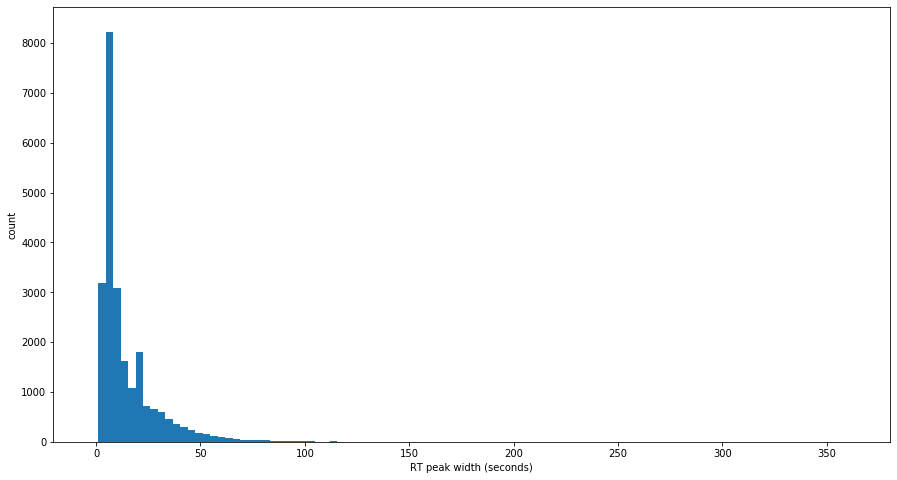

In [13]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
# plt.title('Distribution of RT in {} for features identified as {}, charge {}'.format(selected_group, selected_peptide, selected_peptide_charge))

bins = 100
hist, bins, _ = plt.hist(sequences_df.experiment_rt_peak_width, bins=bins)
plt.xlabel('RT peak width (seconds)')
plt.ylabel('count')

# plt.ylim((0,5500))

# plt.axvline(x=+1, linestyle=':', linewidth=4, color='orange')
# plt.axvline(x=-1, linestyle=':', linewidth=4, color='orange')

plt.show()